# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

In [2]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins_clean = penguins.dropna()
penguins_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
import pandas as pd
penguins_clean_dummies = pd.get_dummies(penguins_clean, columns=['species', 'island', 'sex'], drop_first=True)
penguins_clean_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,0,0,1,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [18]:
pip install scikit-learn

In [7]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = penguins_clean_dummies.drop('bill_depth_mm', axis=1)
y = penguins_clean_dummies['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
predictors = {
    'Model 1': ['bill_length_mm', 'flipper_length_mm'],
    'Model 2': ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap'],
    'Model 3': ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'island_Dream'],
    'Model 4': X_train.columns.tolist()  # All variables
}

model_results = {}

for name, predictor_vars in predictors.items():

    model = LinearRegression()
    model.fit(X_train[predictor_vars], y_train)

    y_train_pred = model.predict(X_train[predictor_vars])
    y_test_pred = model.predict(X_test[predictor_vars])

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    model_results[name] = {'train_error': train_error, 'test_error': test_error}

model_results

{'Model 1': {'train_error': 2.3850501052238915,
  'test_error': 2.5745835311598797},
 'Model 2': {'train_error': 2.258274413004793,
  'test_error': 2.5302328500008926},
 'Model 3': {'train_error': 2.222881313995401,
  'test_error': 2.417171099117841},
 'Model 4': {'train_error': 0.6080213351420923,
  'test_error': 0.6070440223361424}}

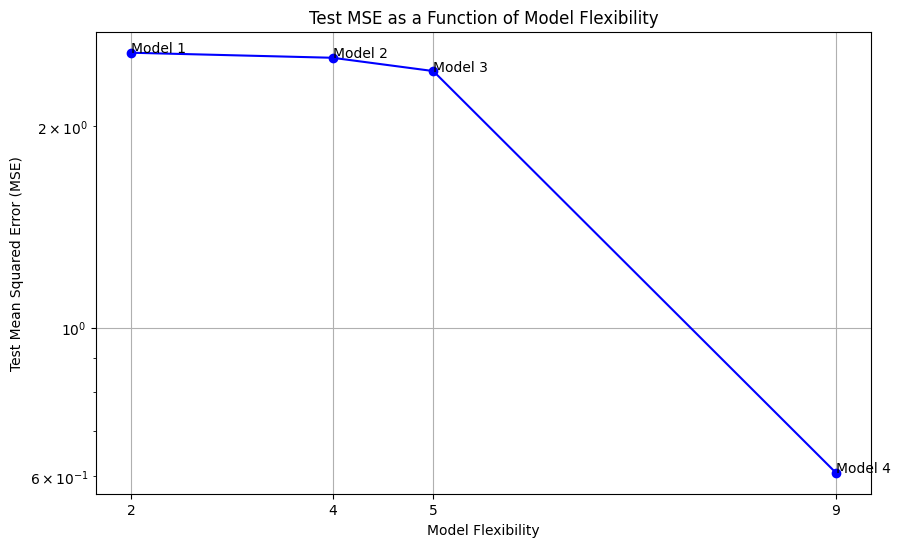

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

model_flexibility = {
    'Model 1': 2,
    'Model 2': 4,
    'Model 3': 5,
    'Model 4': 9
}

results_df = pd.DataFrame(model_results).T
results_df['model'] = results_df.index
results_df = results_df.melt(id_vars='model', var_name='error_type', value_name='error_value')
results_df['flexibility'] = results_df['model'].map(model_flexibility)

test_errors = results_df[results_df['error_type'] == 'test_error']

plt.figure(figsize=(10, 6))
plt.plot(test_errors['flexibility'], test_errors['error_value'], marker='o', linestyle='-', color='b')

for i, row in test_errors.iterrows():
    plt.text(row['flexibility'], row['error_value'], row['model'])

plt.xlabel('Model Flexibility')
plt.ylabel('Test Mean Squared Error (MSE)')
plt.title('Test MSE as a Function of Model Flexibility')
plt.xticks([2, 4, 5, 9])
plt.yscale('log')
plt.grid(True)
plt.show()

Model 4 is the best since it has the smallest MSE in the testing data.  